In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [2]:
adult_census = pd.read_csv("datasets/adult-census.csv")
adult_census.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
feature_names = [
    "age",
    "capital-gain",
    "capital-loss",
    "hours-per-week"
]
target_name = "class"

X = adult_census[feature_names]
y = adult_census[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.describe()

,age,capital-gain,capital-loss,hours-per-week
count,36631.000000,36631.000000,36631.000000,36631.000000
mean,38.685458,1063.206929,86.779831,40.422484
std,13.730130,7374.547590,401.559034,12.425426
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [4]:
scaler = MinMaxScaler()
scaler.set_output(transform="pandas")
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_scaled.describe()

,age,capital-gain,capital-loss,hours-per-week
count,36631.000000,36631.000000,36631.000000,36631.000000
mean,0.297061,0.010632,0.019922,0.402270
std,0.188084,0.073746,0.092185,0.126790
min,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.000000,0.000000,0.397959
50%,0.273973,0.000000,0.000000,0.397959
75%,0.424658,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

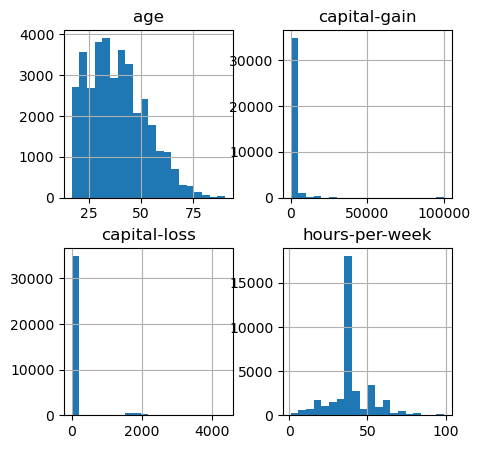

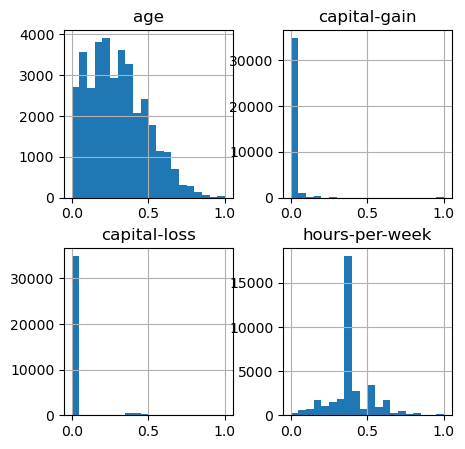

In [5]:
X_train.hist(bins=20, figsize=(5, 5))
X_train_scaled.hist(bins=20, figsize=(5, 5))

In [6]:
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
model.score(X_test_scaled, y_test)

0.8235197772500205